# Часть 1. Визуализация временных рядов

## Задание 2. Построение штабельной диаграммы в R

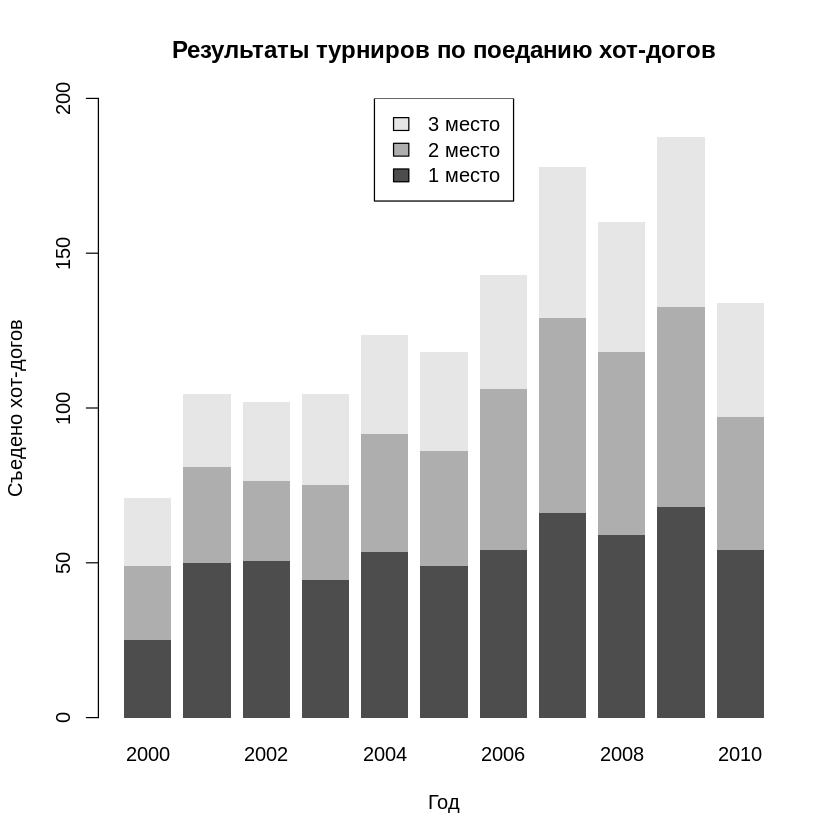

In [ ]:
results = read.csv('https://datasets.flowingdata.com/hot-dog-places.csv', sep=",", header=TRUE)
names(results) <- c("2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009",
"2010")
results_matrix = as.matrix(results)

barplot(results_matrix, border=NA, space=0.25, ylim=c(0, 200), main="Результаты турниров по поеданию хот-догов", xlab="Год", ylab="Съедено хот-догов")
legend("top", legend=c("3 место", "2 место", "1 место"), fill=rev(c("#4d4d4d", "#aeaeae", "#e6e6e6")))

## Задание 2.1. Построение точечного графика в R

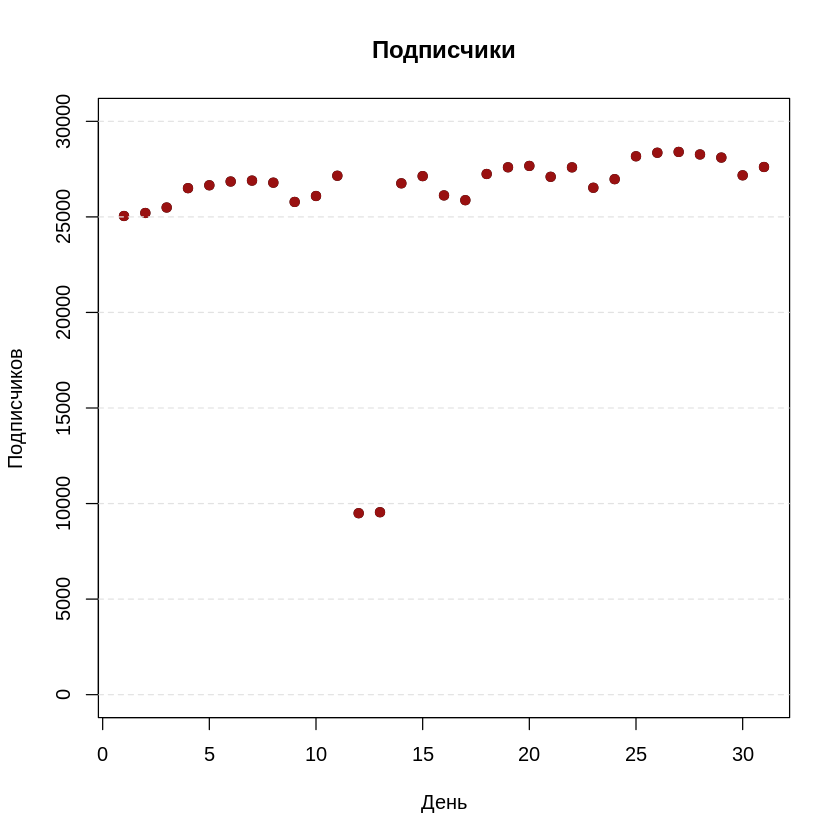

In [ ]:
subscribers <-read.csv("https://datasets.flowingdata.com/flowingdata_subscribers.csv", sep=",", header=TRUE)

plot(subscribers$Subscribers, ylim=c(0, 30000), main="Подписчики", xlab="День", ylab="Подписчиков")
points(subscribers$Subscribers, pch=19, col="#911")

for (y in seq(0, 30000, by=5000)) {
  abline(h=y, col="#e2e2e2", lty="dashed")
}

Задание 2.2 График

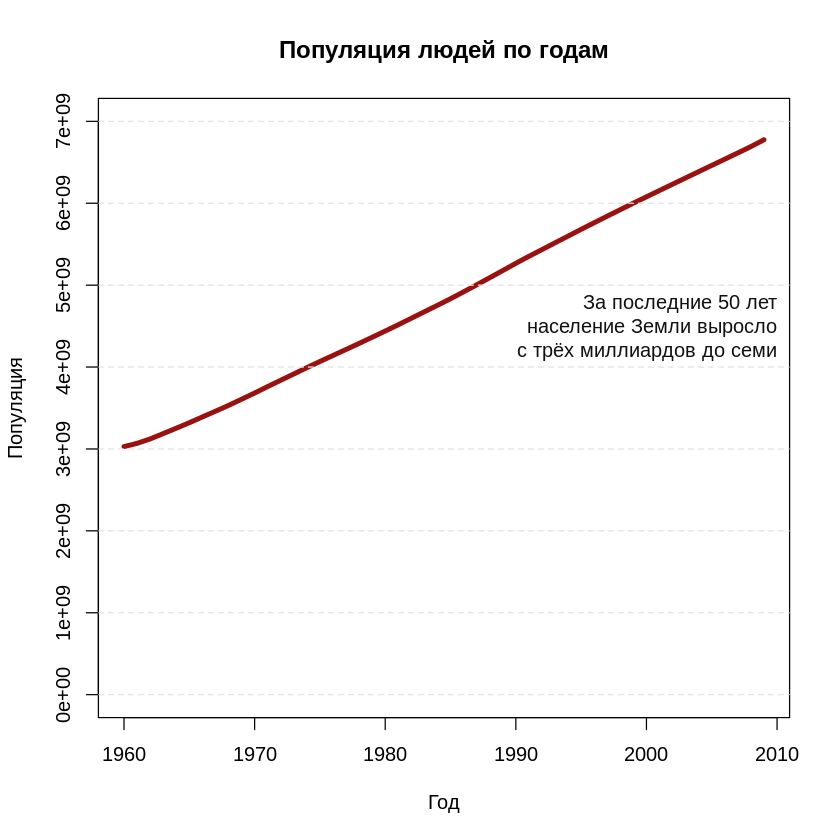

In [ ]:
people <-read.csv("https://datasets.flowingdata.com/world-population.csv", sep=",", header=TRUE)
plot(people$Year, people$Population, type="l", ylim=c(0, 7*10^9), main="Популяция людей по годам", xlab="Год", ylab="Популяция", col="#911", lwd=4)

for (y in seq(0, 7*10^9, by=10^9)) {
  abline(h=y, col="#e2e2e2", lty="dashed")
}

text(x=2010, y=4.5*10^9, labels="За последние 50 лет\n население Земли выросло\n с трёх миллиардов до семи", col="#111111", adj=1)

## Задание 2.3. Ступенчатая диаграмма.

In [ ]:
postage <- read.csv("https://datasets.flowingdata.com/us-postage.csv", sep=",", header=TRUE)

svg("postage-plot.svg", width = 800, height = 580)
par(las = 2)
plot(postage$Year, postage$Price, type="s", ylim=c(0.29, 0.46), col="#911", lwd=4, xlab="Год", ylab="Тариф")

text(postage$Year, postage$Price, labels=paste(postage$Price, "¢", sep=" "), pos=3, offset=0.6)
text(x=1991.33, y=0.446, labels="Почтовые тарифы в США", font=2, cex=1.5, adj = c(0,0))
text(x=1991.33, y=0.414, labels="В 1991 году отправить письм весом 30 грамм\nчерез Почтовую службу США стоило 29 центов.\nВ 2001 году почтовые тарифы выросли до 37 центов\nи с тех пор увеличивались ещё четырежды.", cex=1.2, col="#333", adj = c(0,0))

dev.off()
# Картинка записывается в файлы блокнота. Та, что внизу, залита с файлообменника.

png 
  2

![](https://file.dimius.ru/edu/r/postage-plot.png)

## Задание 2.4. Сглаживание и оценка в R

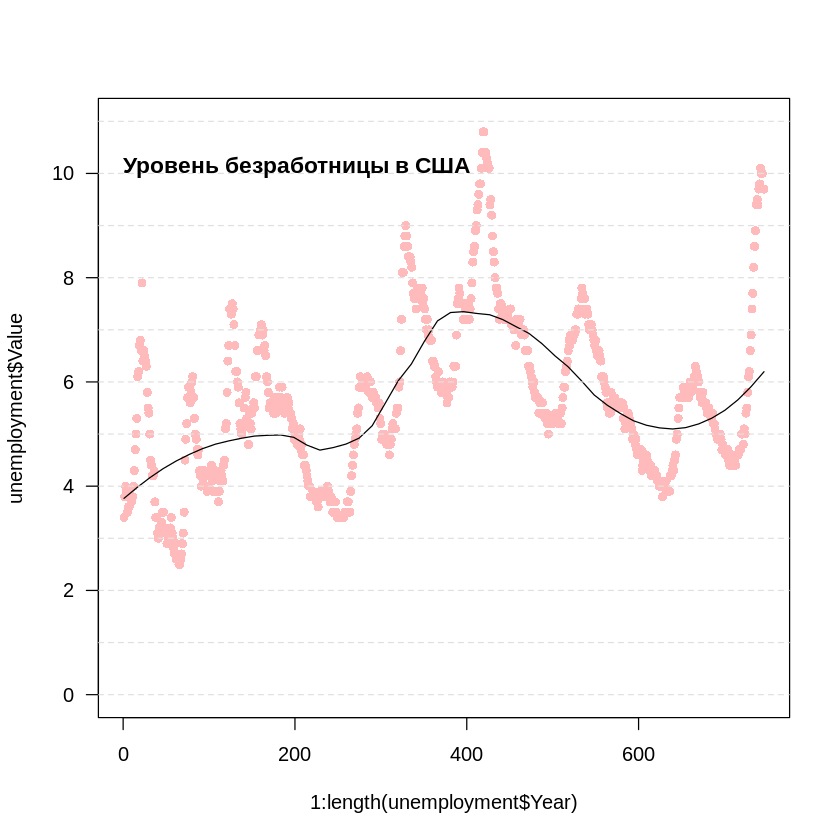

In [ ]:
unemployment <- read.csv("https://datasets.flowingdata.com/unemployment-rate-1948-2010.csv")

par(las = 2); par(las = 1)
scatter.smooth(x=1:length(unemployment$Year), y=unemployment$Value, ylim=c(0,11), degree=2, col="#fbb", span=0.5, pch=16)

for (y in seq(0, 11, by=1)) {
  abline(h=y, col="#e0e0e0", lty="dashed")
}

text(x=0, y=10, labels="Уровень безработницы в США", font=2, cex=1.14, adj = c(0,0))

<img src = "https://file.dimius.ru/edu/r/unemployment-plot.png" width="400" height = "400">

Code without visible output:

# Часть 2. Визуализация зависимостей

## Задание 1. Диаграмма рассеяния

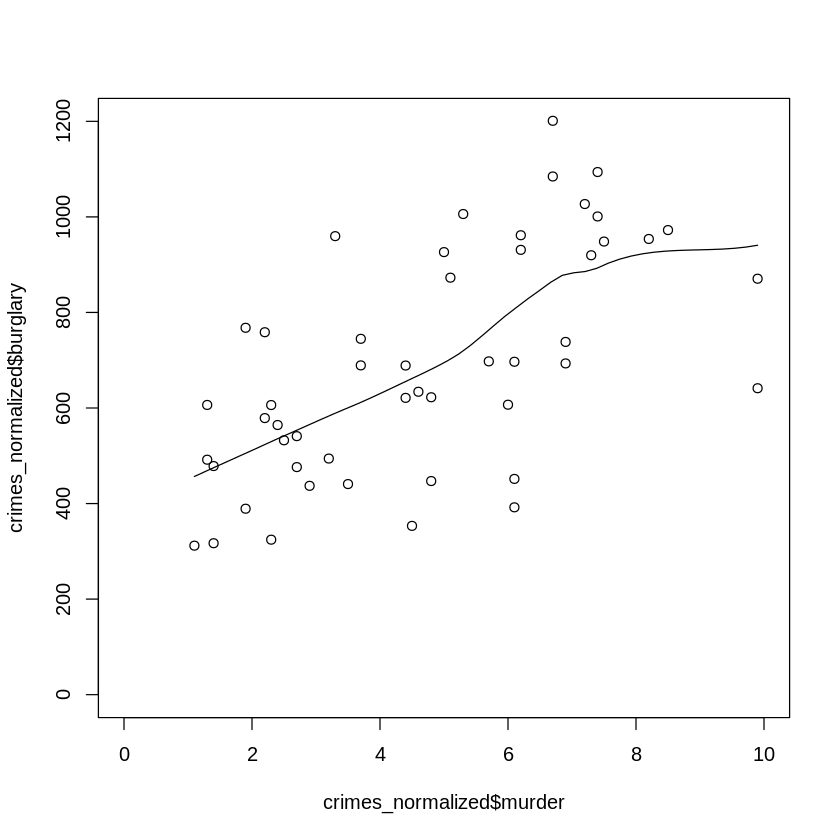

In [ ]:
crimes <- read.csv("https://datasets.flowingdata.com/crimeRatesByState2005.csv")
crimes_normalized = crimes[crimes$state != "District of Columbia",]
crimes_normalized = crimes_normalized[crimes_normalized$state != "United States",]

scatter.smooth(crimes_normalized$murder, crimes_normalized$burglary, xlim=c(0, 10), ylim=c(0, 1200))

## Задание 2. Матрица диаграмм рассеяния

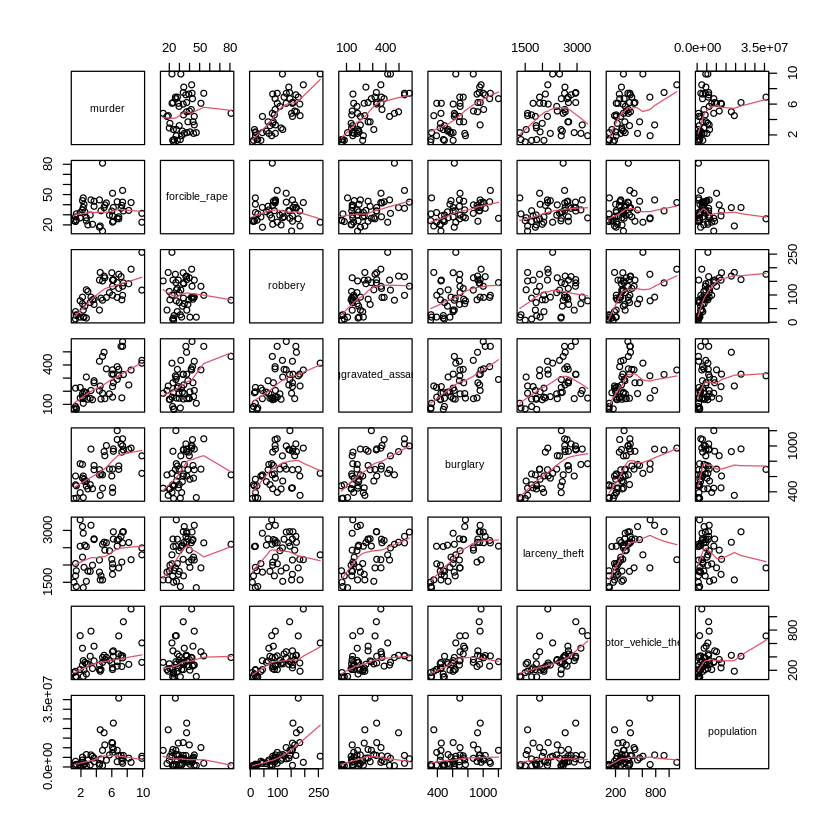

In [ ]:
pairs(crimes_normalized[,2:9], panel=panel.smooth)

## Задание 3. Создайте пузырьковую диаграмму

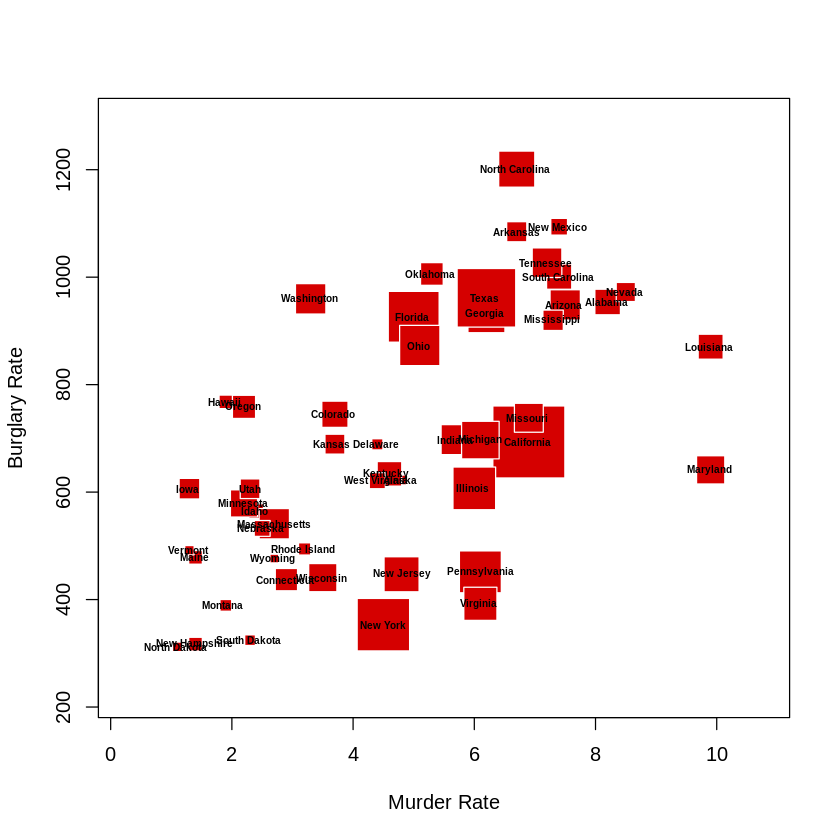

In [ ]:
crime = read.csv("https://datasets.flowingdata.com/crimeRatesByState2005.tsv",
                 header=TRUE, sep="\t")

size = sqrt(crime$population)

symbols(crime$murder, crime$burglary, squares=size, inches=0.6, fg="white", bg="#d50000", xlab="Murder Rate", ylab="Burglary Rate")
text(crime$murder, crime$burglary, crime$state, cex=0.5, font=2)

# Часть 3. Выявление различий

## Задание 1. Создание тепловой карты

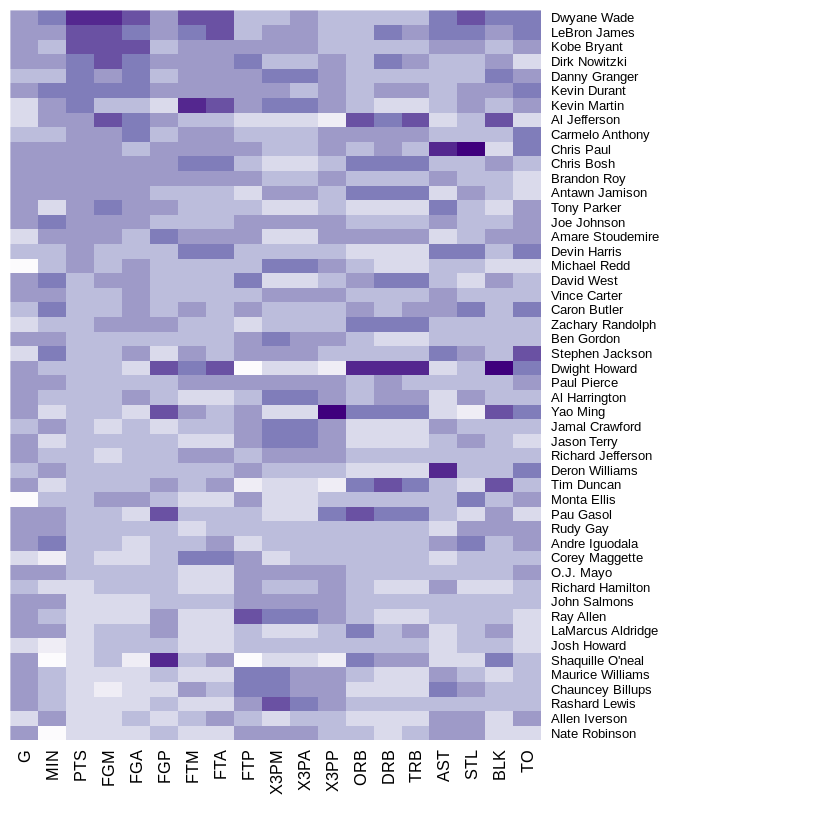

In [ ]:
library(RColorBrewer)
basketball = read.csv("http://datasets.flowingdata.com/ppg2008.csv")

row.names(basketball) <- basketball$Name
basketball <- basketball[,2:20]

basketball_matrix = data.matrix(basketball[order(basketball$PTS, decreasing=FALSE),])
basketball_heatmap <- heatmap(basketball_matrix, Rowv=NA, Colv=NA,  col = brewer.pal(9, "Purples"), scale="column", margins=c(5,15))

## Задание 2. «Лица Чернова»

In [ ]:
library(aplpack)
faces(basketball[,2:16], ncolors=0)

# :(

ERROR: Error in library(aplpack): there is no package called ‘aplpack’


## Задание 3. Создание диаграммы-радара

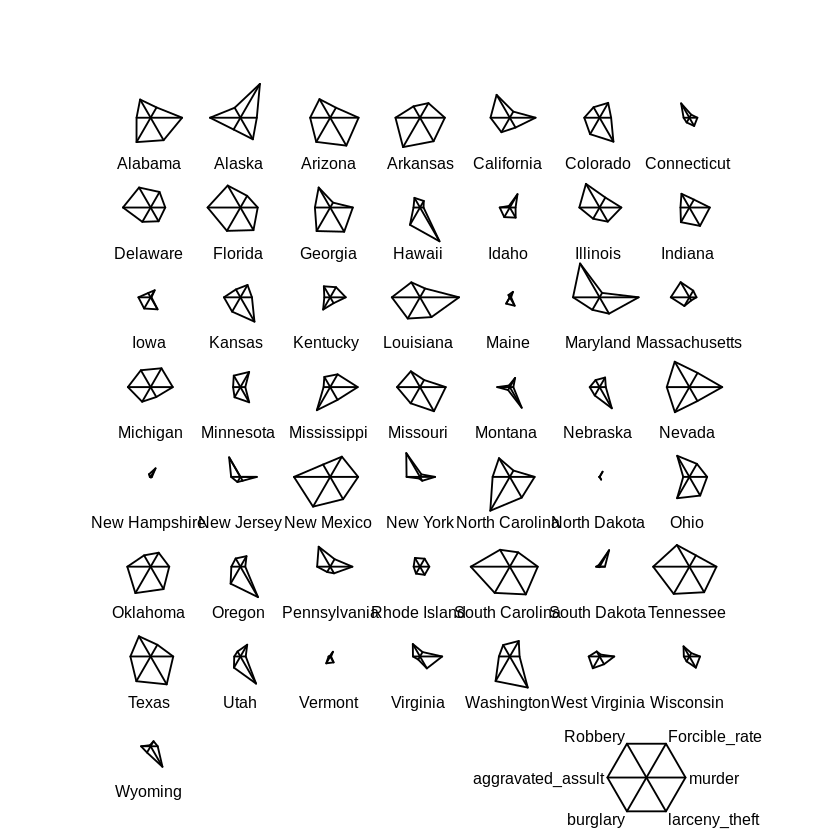

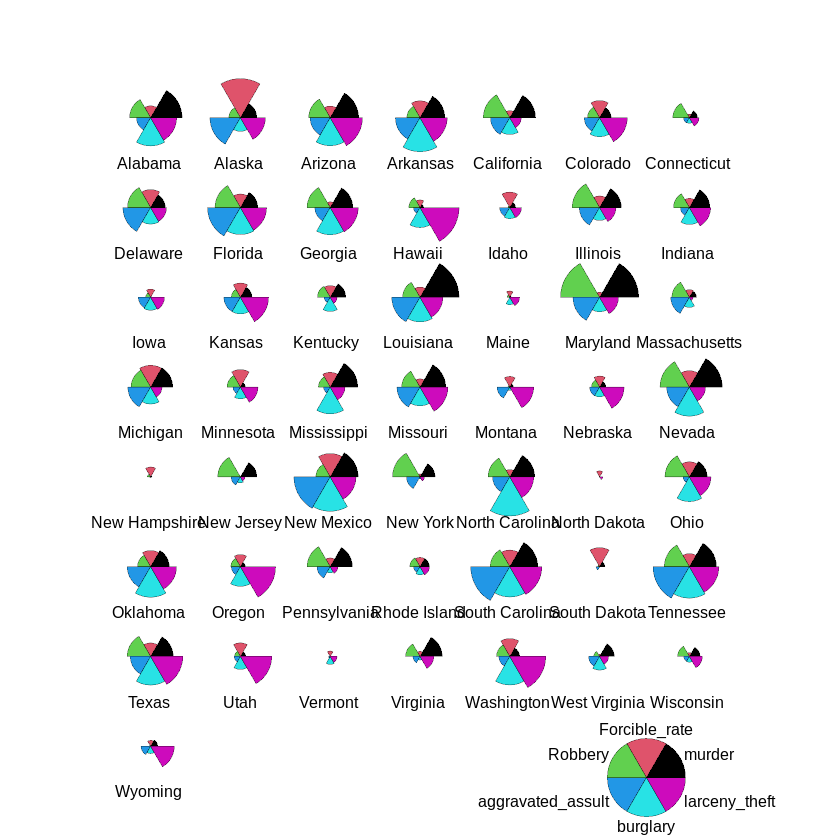

In [ ]:
crime = read.csv("https://datasets.flowingdata.com/crimeRatesByState2005.tsv", header=TRUE, sep="\t")

row.names(crime) <- crime$state
crime <- crime[,2:7]
stars(crime, flip.labels=FALSE, key.loc = c(15, 1.5), lwd=1.5)
stars(crime, flip.labels=FALSE, key.loc = c(15, 1.5), draw.segments=TRUE)